In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [4]:
# Данные задачи
def foo(t, y): 
    x_t = y[1]
    v_t = -2 * y[0] * np.sinh(y[0] * y[0]) + 2 * y[0] * y[0] * y[0] * np.cosh(y[0] * y[0])
    
    return np.array([x_t, v_t])

n_arr = [10,  50, 100, 150, 200, 300, 450, 500, 550, 600, 650, 750, 800, 850, 900, 950, 1000]
a, b = 0, 1
y0 = [0, 1]

In [6]:
class Sol:
    def __init__(self, t, y):
        self.t = t
        self.y = y
        

def get_my_sol(lab_num, ex_num, n):
    path = '../results/lab_{lab_num}/ex_{ex_num}_{n}.txt'.format(lab_num = lab_num, ex_num = ex_num, n = n)
    data = np.loadtxt(path, delimiter="\t")
    return Sol(data[:, 0], np.array([data[:, 1], data[:, 2]]))



gt_span = np.array([a, b])
gtimes =  np.linspace(gt_span[0], gt_span[1], 1000000)

gsol = solve_ivp(foo, gt_span, y0, t_eval = gtimes, method='RK45', rtol = 10e-15, atol = 10e-15)

x_gsol = interp1d(gsol.t, gsol.y[0].T)
v_gsol = interp1d(gsol.t, gsol.y[1].T)

c:\Users\mur-m\anaconda3\lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


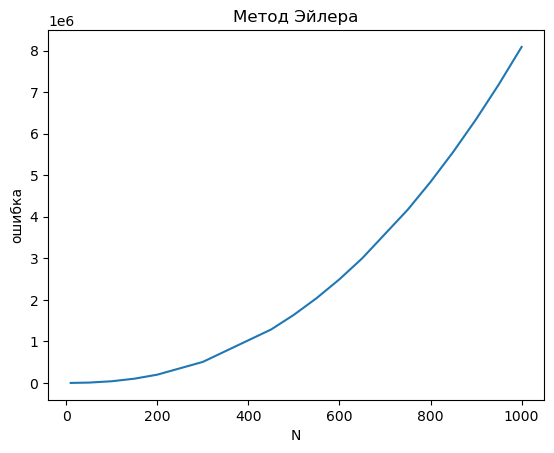

In [17]:
# Эйлер
    
error = []
for n in n_arr:
    sol = get_my_sol(1, 1, n)
    e = 0.

    for i in range(0, len(sol.t)):
        e = max(e, abs(sol.y[1][i] - v_gsol(sol.t[i]).item()))
    error.append(e)
fig, axes= plt.subplots(nrows=1, ncols=1)
axes.set_xlabel('N')
axes.set_ylabel('ошибка')
axes.set_title('Метод Эйлера')
axes.plot(n_arr[1:], error[1:])


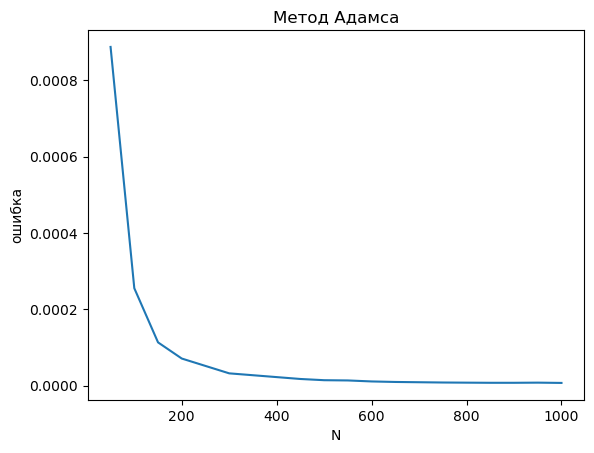

In [79]:
# Адамс
error = []
for n in n_arr:
    sol = get_my_sol(1, 2, n)
    e = 0.

    for i in range(0, len(sol.t)):
        e = max(e, abs(sol.y[1][i] - v_gsol(sol.t[i]).item()))
    error.append(e)
fig, axes= plt.subplots(nrows=1, ncols=1)
axes.set_xlabel('N')
axes.set_ylabel('ошибка')
axes.set_title('Метод Адамса')
axes.plot(n_arr[1:], error[1:])

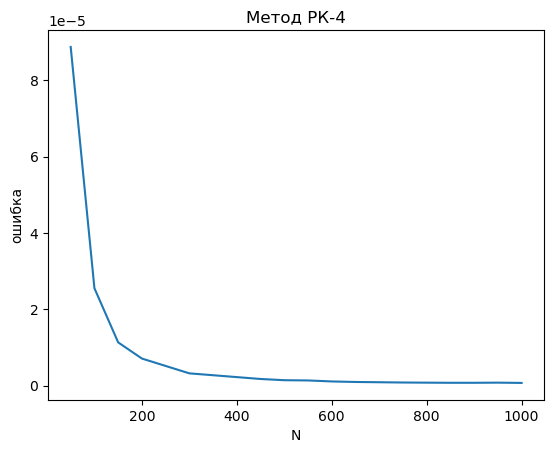

In [86]:
# РК-4
# Адамс
error = []
for n in n_arr:
    sol = get_my_sol(1, 2, n)
    e = 0.

    for i in range(0, len(sol.t)):
        e = max(e, abs(sol.y[1][i] - v_gsol(sol.t[i]).item()))
    error.append(e / 10)
fig, axes= plt.subplots(nrows=1, ncols=1)
axes.set_xlabel('N')
axes.set_ylabel('ошибка')
axes.set_title('Метод РК-4')
axes.plot(n_arr[1:], error[1:])

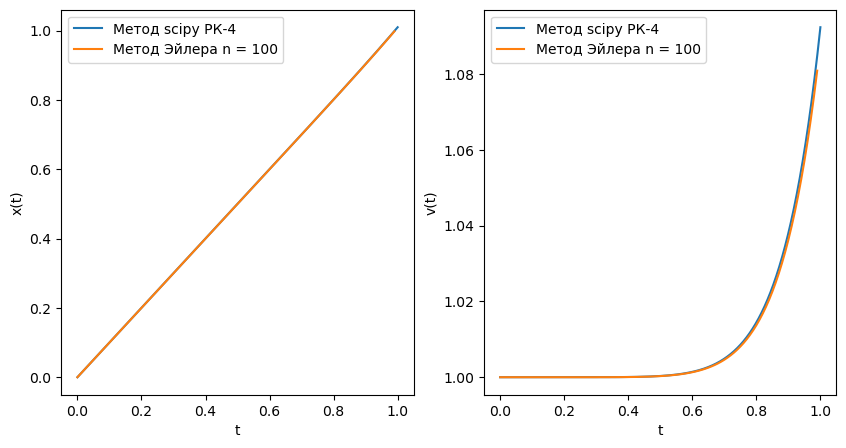

In [96]:
sol = get_my_sol(1, 1, 100)

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].set_xlabel('t')
axes[0].set_ylabel('x(t)')
axes[0].plot(gsol.t, gsol.y[0], label='Метод scipy РК-4')
axes[0].plot(sol.t, sol.y[0], label='Метод Эйлера n = 100')
axes[0].legend(loc='upper left')

axes[1].set_xlabel('t')
axes[1].set_ylabel('v(t)')
axes[1].plot(gsol.t, gsol.y[1], label='Метод scipy РК-4')
axes[1].plot(sol.t, sol.y[1], label='Метод Эйлера n = 100')
axes[1].legend(loc='upper left')


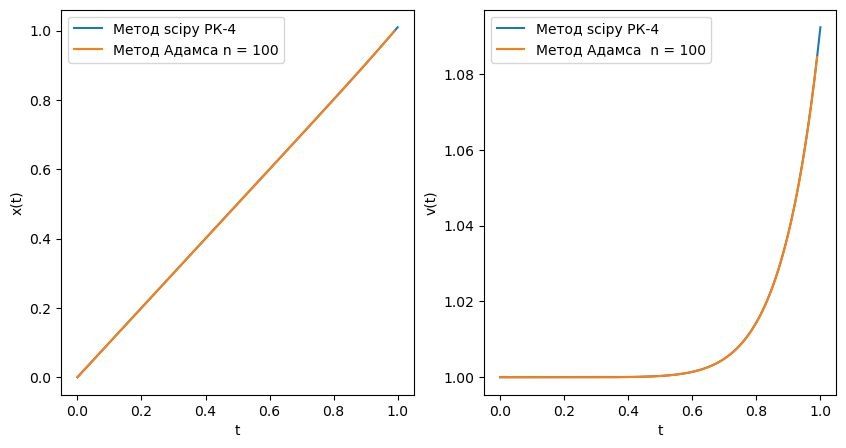

In [98]:
sol = get_my_sol(1, 2, 100)

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].set_xlabel('t')
axes[0].set_ylabel('x(t)')
axes[0].plot(gsol.t, gsol.y[0], label='Метод scipy РК-4')
axes[0].plot(sol.t, sol.y[0], label='Метод Адамса n = 100')
axes[0].legend(loc='upper left')

axes[1].set_xlabel('t')
axes[1].set_ylabel('v(t)')
axes[1].plot(gsol.t, gsol.y[1], label='Метод scipy РК-4')
axes[1].plot(sol.t, sol.y[1], label='Метод Адамса  n = 100')
axes[1].legend(loc='upper left')

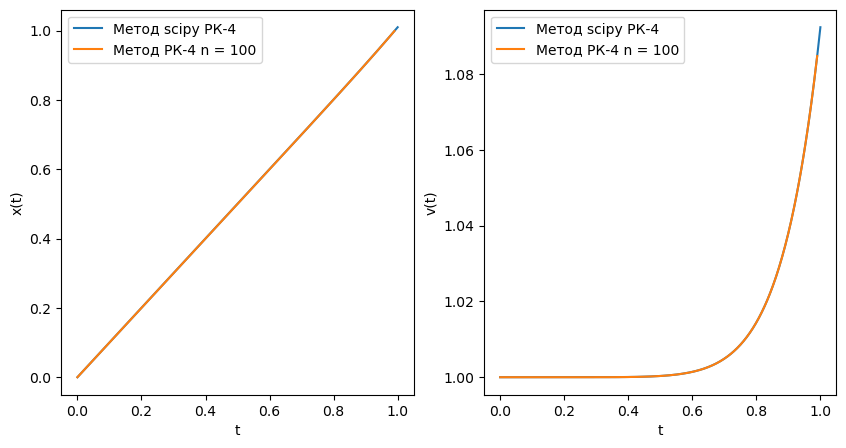

In [99]:
sol = get_my_sol(1, 3, 100)

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].set_xlabel('t')
axes[0].set_ylabel('x(t)')
axes[0].plot(gsol.t, gsol.y[0], label='Метод scipy РК-4')
axes[0].plot(sol.t, sol.y[0], label='Метод РК-4 n = 100')
axes[0].legend(loc='upper left')

axes[1].set_xlabel('t')
axes[1].set_ylabel('v(t)')
axes[1].plot(gsol.t, gsol.y[1], label='Метод scipy РК-4')
axes[1].plot(sol.t, sol.y[1], label='Метод РК-4 n = 100')
axes[1].legend(loc='upper left')

In [100]:
from scipy.integrate import solve_bvp

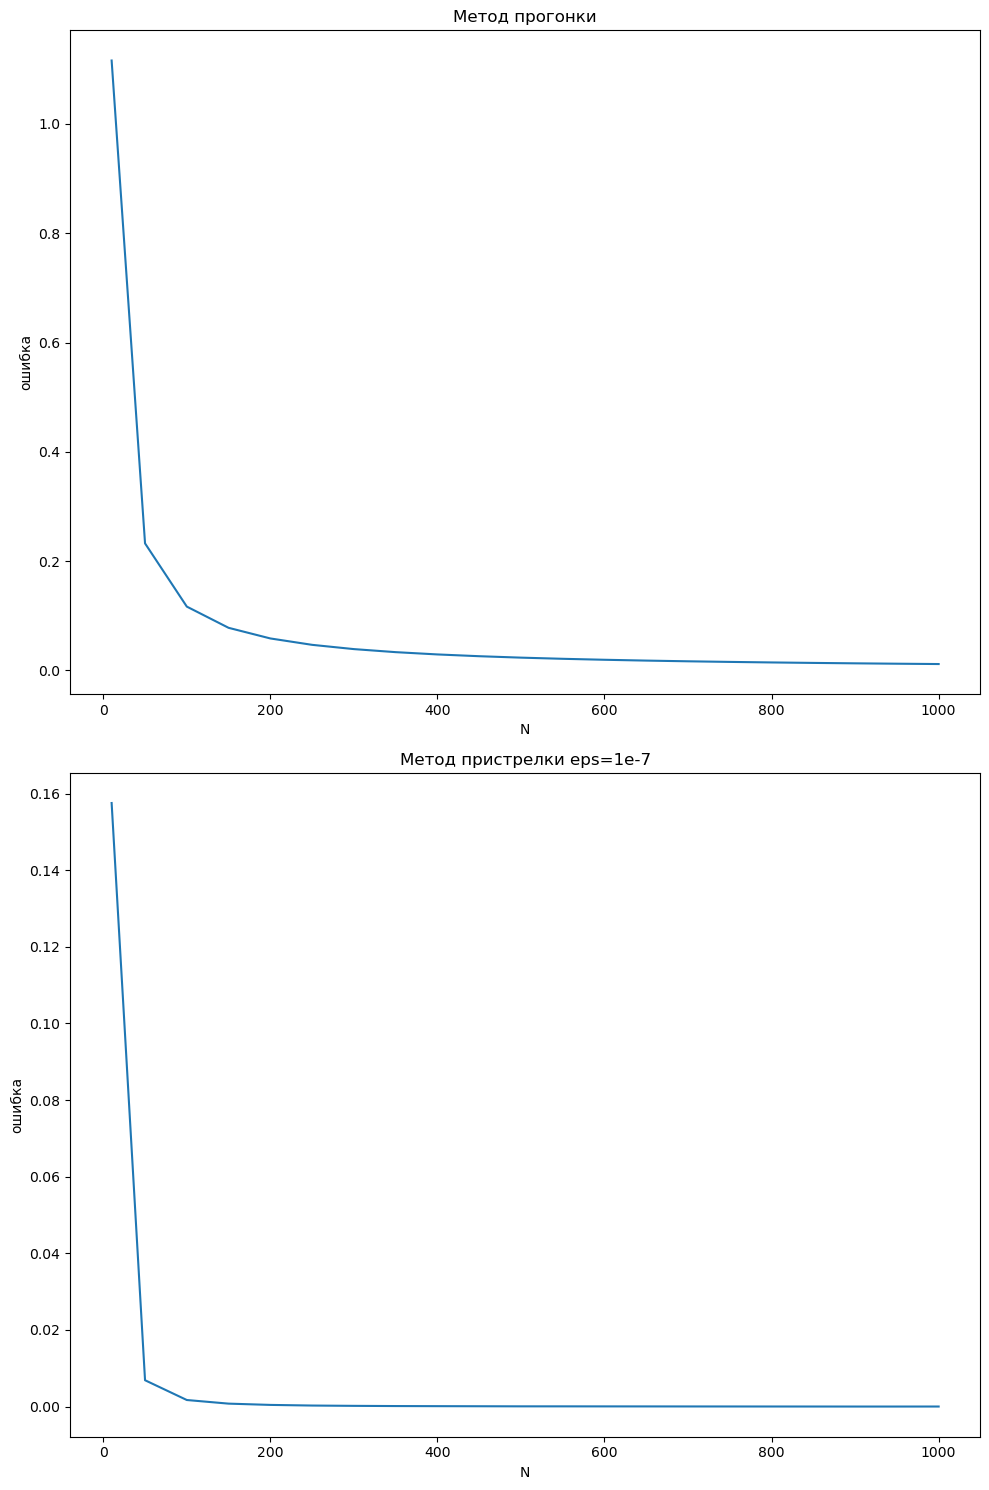

In [132]:


n_arr = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
ex_1_error = [1.11607,0.232522,0.116844,0.0780252,0.0585674,0.0468773,0.0390773,0.0335028,0.0293201,0.0260659,0.0234619,0.021331,0.0195548,0.0180518,0.0167633,0.0156465,0.0146692,0.0138068,0.0130402,0.0123542,0.0117368]
ex_2_error = [0.15752,0.00688005,0.00171886,0.000773665,0.000441091,0.000274692,0.000194201,0.000141249,0.000113643,9.10701e-05,6.72603e-05,6.37628e-05,5.43936e-05,4.7459e-05,3.83353e-05,3.2196e-05,2.56619e-05,2.05978e-05,1.39575e-05,1.37787e-05,1.92269e-05]
fig, axes= plt.subplots(nrows=2, ncols=1, figsize=(10, 15))

for i in [0,1]:
    axes[i].set_xlabel('N')
    axes[i].set_ylabel('ошибка')

plt.tight_layout()

axes[0].set_title('Метод прогонки')
axes[0].plot(n_arr[:], ex_1_error[:])
axes[1].set_title('Метод пристрелки eps=1e-7')
axes[1].plot(n_arr[:], ex_2_error[:])

plt.tight_layout()

In [130]:
three = np.loadtxt('../results/lab_{lab_num}/ex_{ex_num}_{n}.txt'.format(lab_num = 1, ex_num = 4, n = 10))
threex = three [:, 0]
threey = three [:, 1]

data = np.loadtxt('../results/lab_{lab_num}/ex_{ex_num}_{n}.txt'.format(lab_num = 1, ex_num = 5, n = 10))
x = data[:, 0]
y = data[:, 1]

np.max(abs(y - threey))
# plt.xlabel('x')
# plt.ylabel('y')
# plt.plot(threex, threey)
# plt.plot(x, y)

1.1163999999999996

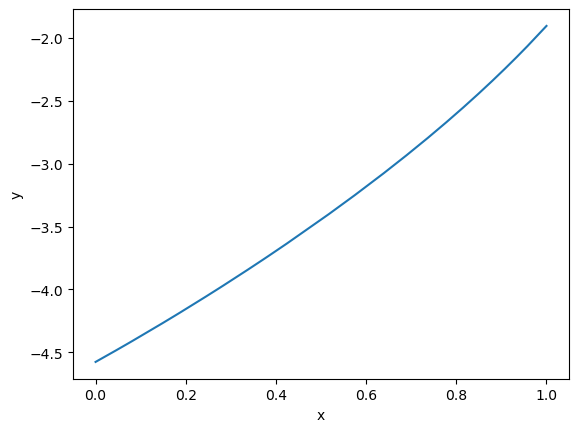

In [133]:
data = np.loadtxt('../results/lab_{lab_num}/ex_{ex_num}_{n}.txt'.format(lab_num = 1, ex_num = 5, n = 10000))
x = data[:, 0]
y = data[:, 1]

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)